# Boston House Pricing Prediction using Machine Learning

Dibuat oleh: Anthony Kevin Oktavius

Library Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import klib
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA

**Deskripsi Dataset:**

Ada 14 variabel yang terdapat pada dataset ini, yaitu sebagai berikut.

* **Crim**: per kapita rasio kriminal pada suatu kota.
* **Zn**: proporsi lahan residensial yang ditempati untuk lebih dari 25 ribu kaki kuadrat.
* **Indus**: proporsi hektar bisnis non-ritel per suatu kota.
* **Chas**: 1 jika saluran membatasi sungai Charles. 0 jika saluran tidak membatasi sungai Charles.
* **Nox**: konsentrasi oxida nitrit (per 10 juta).
* **Rm**: rata-rata jumlah ruangan per rumah tempat tinggal.
* **Age**: proporsi unit yang telah ditempati pemilik sejak 1940.
* **Dis**: jarak ke lima tempat rekruitmen di boston.
* **Rad**: indeks aksesibilitas ke jalan lingkar.
* **Tax**: pajak properti nilai penuh per 10 000 dolar.
* **Ptratio**: rasio antara siswa dan guru pada suatu kota.
* **b**: didapat dari rumus: B - 1000 (BK - 0.63)^2, dimana Bk adalah proporsi orang berkulit hitam di suatu kota.
* **lstat**: persentase penurunan populasi.
* **medv**: nilai harga median dari rumah yang ditempati pemilik, dalam nilai ribuan dolar.

Deskripsi dataset diambil di: https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html.

Dataset Preparation

In [2]:
housing_df = pd.read_csv("boston_housing.csv")
housing_df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


Melihat informasi masing-masing field

In [3]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


Melihat data statistikal pada masing-masing field numerik.

In [4]:
housing_df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Melihat bagian head

In [5]:
housing_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Melihat bagian tail

In [6]:
housing_df.tail()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


Menbuat variabel pada masing-masing list field, agar lebih mudah untuk melakukan manajemen tiap field.

In [7]:
# General Data Field
criminal_field = "crim"
zoned_field = "zn"
industrial_field = "indus"
charles_river_field = "chas"
nitric_oxide_field = "nox"
room_field = "rm"
age_field = "age"
distance_field = "dis"
radial_field = "rad"
tax_field = "tax"
pupil_teacher_ratio_field = "ptratio"
b_field = "b"
lower_stat_field = "lstat"
median_value_field = "medv"

# PCA Field
crowd_level_field = "crowd_level"

In [8]:
feature_selection_fields = [room_field, tax_field, pupil_teacher_ratio_field, 
                            lower_stat_field, median_value_field]

Melihat data-data yang unik pada masing-masing field

In [9]:
housing_df.nunique()

crim       504
zn          26
indus       76
chas         2
nox         81
rm         446
age        356
dis        412
rad          9
tax         66
ptratio     46
b          357
lstat      455
medv       229
dtype: int64

In [10]:
limit_show_unique = 20

fields = [criminal_field, zoned_field, industrial_field, charles_river_field,
          nitric_oxide_field, room_field, age_field, distance_field,
          radial_field, tax_field, pupil_teacher_ratio_field, b_field,
          lower_stat_field, median_value_field]

for index, field in enumerate(fields):
    print(f"{field}:")
    print(housing_df[field].unique()[:8])

crim:
[0.00632 0.02731 0.02729 0.03237 0.06905 0.02985 0.08829 0.14455]
zn:
[ 18.    0.   12.5  75.   21.   90.   85.  100. ]
indus:
[2.31 7.07 2.18 7.87 8.14 5.96 2.95 6.91]
chas:
[0 1]
nox:
[0.538 0.469 0.458 0.524 0.499 0.428 0.448 0.439]
rm:
[6.575 6.421 7.185 6.998 7.147 6.43  6.012 6.172]
age:
[65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1]
dis:
[4.09   4.9671 6.0622 5.5605 5.9505 6.0821 6.5921 6.3467]
rad:
[1 2 3 5 4 8 6 7]
tax:
[296 242 222 311 307 279 252 233]
ptratio:
[15.3 17.8 18.7 15.2 21.  19.2 18.3 17.9]
b:
[396.9  392.83 394.63 394.12 395.6  386.63 386.71 392.52]
lstat:
[ 4.98  9.14  4.03  2.94  5.33  5.21 12.43 19.15]
medv:
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1]


Melakukan list variabel kategorikal dan numerikal.

In [11]:
numerical_features = [criminal_field, zoned_field, industrial_field, nitric_oxide_field,
                        room_field, age_field, distance_field, tax_field,
                        pupil_teacher_ratio_field, b_field, lower_stat_field, median_value_field]
categorical_features = [charles_river_field, radial_field]

print(len(numerical_features))
print(len(categorical_features))

12
2


## Data Visualization

Define Common Functions

In [12]:
def get_plot_figure(width, height):
    figure = plt.figure()
    figure.set_figwidth(width)
    figure.set_figheight(height)
    return figure

### Categorical Features

#### Single Variable

##### Categorical Features 

Pie Chart - Composition

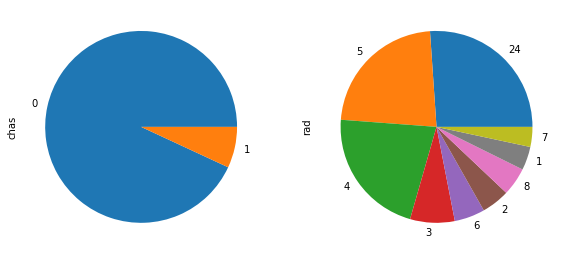

In [13]:
figure = get_plot_figure(15, 15)

for index, categorical_field in enumerate(categorical_features):
    plt.subplot(3, 3, index + 1)

    labels = housing_df[categorical_field]
    data = housing_df[categorical_field].value_counts().plot(kind='pie')

plt.show()

**Insight:**
 
* **Chas:** persentase jumlah saluran pada rumah yang melewati sungai Charles River lebih besar daripada yang tidak melewati sungai tersebut.
  
* **Rad:** persentase jumlah rumah lebih banyak dengan aksesibilitas indeks 4, 5, dan 24.

**Bar Plot - Comparison**

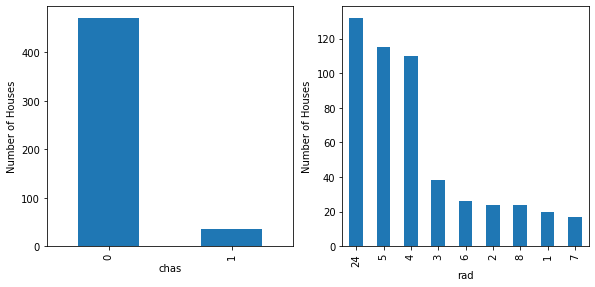

In [14]:
figure = get_plot_figure(15, 15)

for index, categorical_field in enumerate(categorical_features):
    plt.subplot(3, 3, index + 1)
    plt.xlabel(categorical_field)
    plt.ylabel("Number of Houses")
    housing_df[categorical_field].value_counts().plot(kind='bar')
    
plt.show()

**Insight:**
 
* **Chas:** jumlah saluran pada rumah yang melewati sungai Charles River lebih besar daripada yang tidak melewati sungai tersebut.
  
* **Rad:** jumlah rumah lebih banyak dengan aksesibilitas indeks 4, 5, dan 24.

##### Numerical Features

Distribution Plot - Distribution

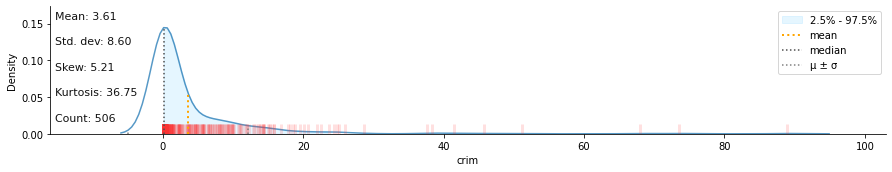

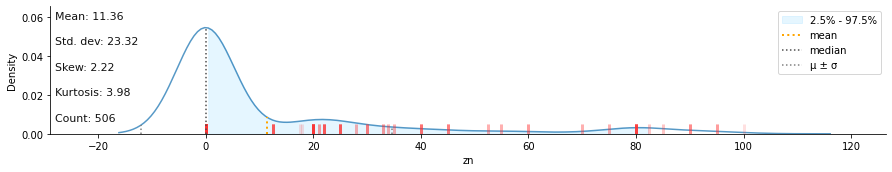

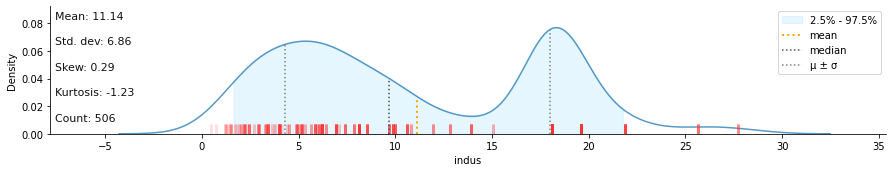

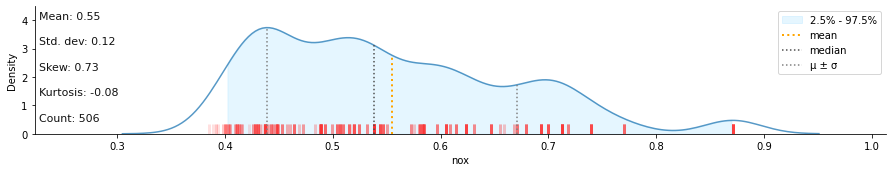

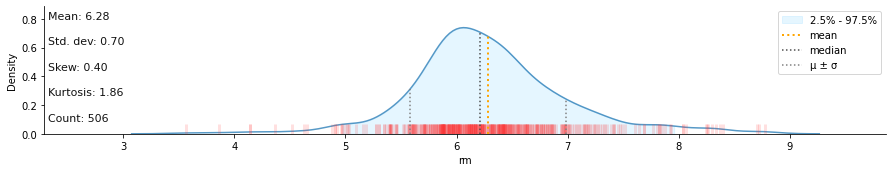

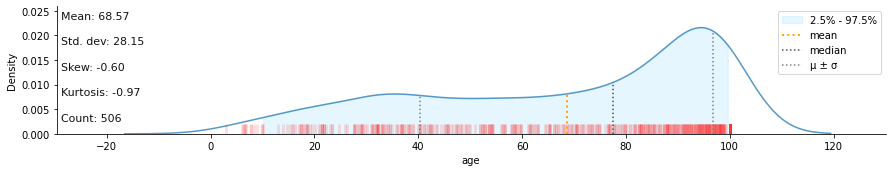

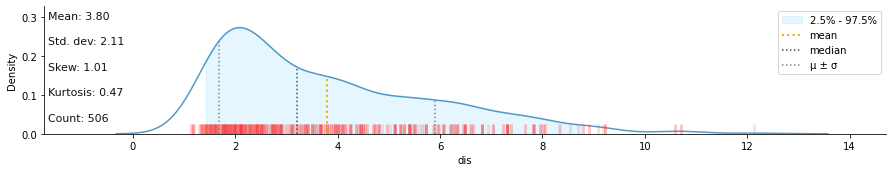

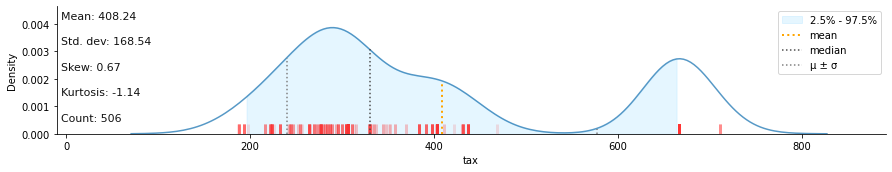

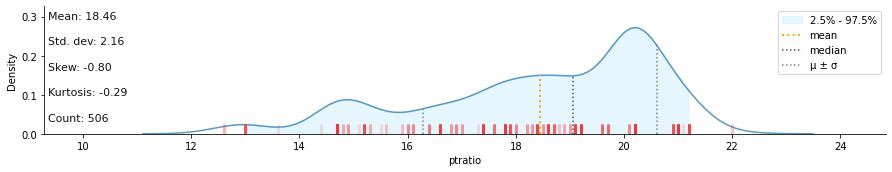

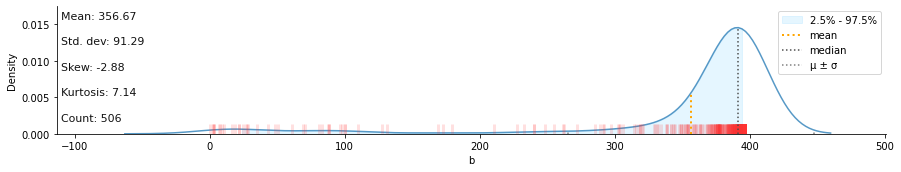

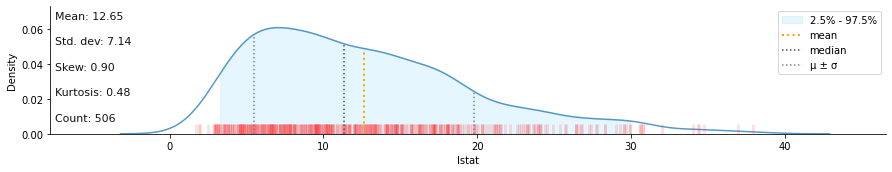

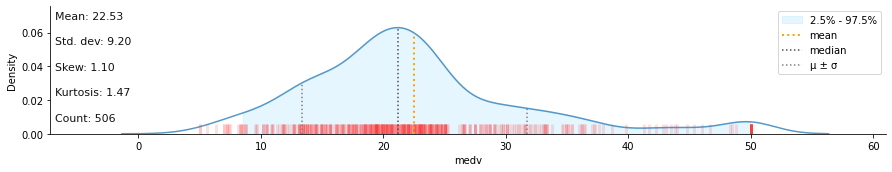

In [15]:
klib.dist_plot(housing_df[numerical_features])
plt.show()

**Insight:**

* **Crim:** persebaran data tingkat rata kriminal terpusat sekitar di antara nilai 0 sampai 5.
* **Zn:** persebaran  data hektar rumah terpusat di antara -15 sampai 15.
* **Indus:** persebaran data indus terpusat di antara 3 sampai 10 dan 17 sampai 23.
* **Nox:** persebaran data nilai nitric oxide terpusat di antara 0.4 sampai 0.75.
* **Rm:** persebaran data jumlah ruangan terpusat di antara 5 sampai 7.
* **Age:** persebaran data umur rumah terpusat di antara 20 sampai 100.
* **Dis:** persebaran data jarak rumah terpusat di antara 2 sampai 8.
* **Tax:** persebaran data tax rumah terpusat di antara 200 sampai 400 dan 600 sampai 750.
* **Ptratio:** persebaran data rasio antara guru dan anak terpusat di antara 14 sampai 21.
* **b:** persebaran data proporsi orang berkulit hitam di suatu kota berpusat di antara 350 sampai 450.
* **lstat:** persebaran data persentase penurunan populasi berpusat di antara 5 sampai 20.
* **medv:** persebaran data nilai median harga rumah berpusat di antara 10 sampai 35 ribu dolar. 

Box Plot - Distribution & Comparison

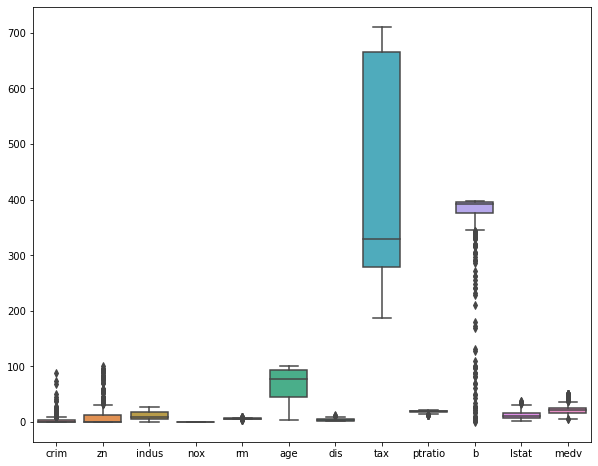

In [16]:
figure = get_plot_figure(10, 8)

sns.boxplot(data = housing_df[numerical_features])
plt.show()

**Insight**:

Dari box plotting di atas, terlihat bahwa variabel crim, zn, b, dan medv memiliki banyak outlier.

### Two Variables

##### Categorical Features

Multiple Bar Charts - Comparison & Relationship

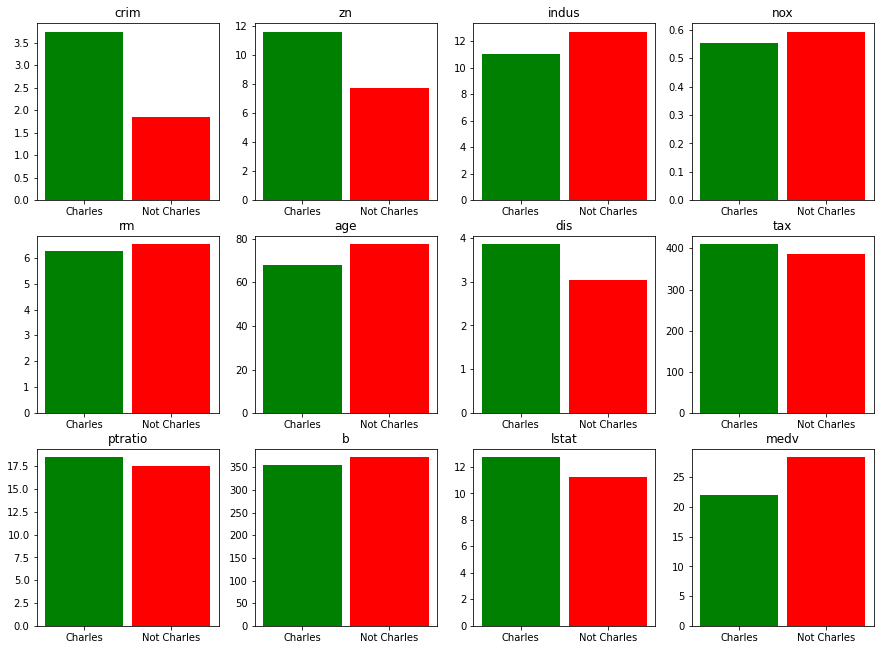

In [17]:
stacked_bar_chart_width = 0.9
no_charles_river_color = 'red'
charles_river_color = 'green'

figure = plt.figure()
figure.set_figwidth(15)
figure.set_figheight(15)


stacked_bar_fields = numerical_features.copy()
stacked_bar_fields.append(charles_river_field)

for index, field in enumerate(stacked_bar_fields):
    
    if field == charles_river_field:
        continue

    plt.subplot(4, 4, index + 1)

    total_is_not_charles = housing_df[housing_df[charles_river_field] == 0].groupby(charles_river_field)[field].mean()
    total_is_charles = housing_df[housing_df[charles_river_field] == 1].groupby(charles_river_field)[field].mean()

    unique_is_not_charles = list(total_is_not_charles.index)[:6]
    unique_is_charles = list(total_is_charles.index)[:6]

    plt.title(field)

    plt.xticks([0, 1], ['Charles', 'Not Charles'])

    plt.bar(unique_is_charles, total_is_charles, color = no_charles_river_color, width=stacked_bar_chart_width)
    plt.bar(unique_is_not_charles, total_is_not_charles, color = charles_river_color, width=stacked_bar_chart_width)

plt.show()

**Insight**:

* Pada variabel **crim**, rata-rata nilai kriminalitas pada rumah dengan saluran rumah membatasi sungai charles lebih tinggi daripada yang tidak membatasi sungai tersebut.
* Pada variabel **zn**, proporsi lahan residensial yang besar memiliki lebih banyak saluran yang membatas sungai charles.
* Pada variabel **medv**, nilai harga rumah lebih murah jika rumah tersebut memiliki saluran yang membatasi sungai charles.
* Variabel **charles** tidak memberikan insight umum untuk melakukan optimisasi model.

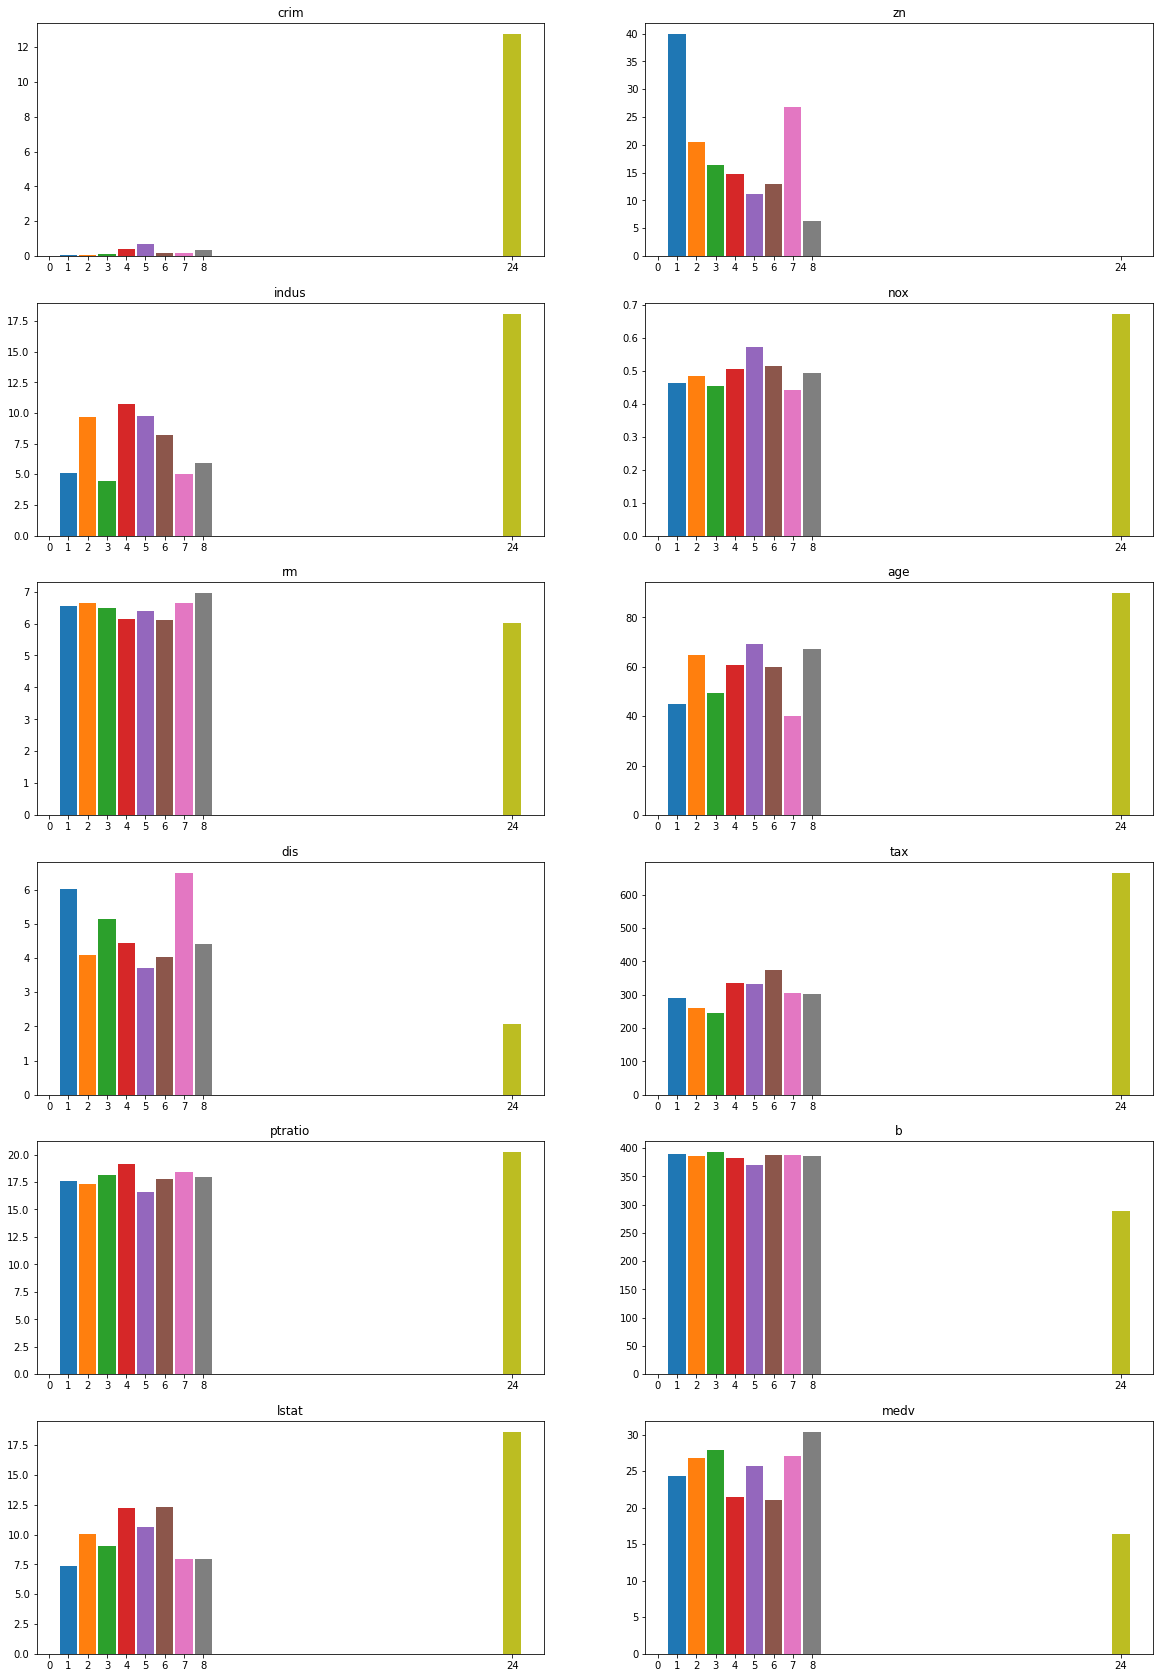

In [18]:
stacked_bar_chart_width = 0.9

figure = get_plot_figure(20, 30)

stacked_bar_fields = numerical_features.copy()
stacked_bar_fields.append(radial_field)

for index, field in enumerate(stacked_bar_fields):
    
    if field == radial_field:
        continue

    plt.subplot(6, 2, index + 1)

    total_radial_1 = housing_df[housing_df[radial_field] == 1].groupby(radial_field)[field].mean()
    total_radial_2 = housing_df[housing_df[radial_field] == 2].groupby(radial_field)[field].mean()
    total_radial_3 = housing_df[housing_df[radial_field] == 3].groupby(radial_field)[field].mean()
    total_radial_4 = housing_df[housing_df[radial_field] == 4].groupby(radial_field)[field].mean()
    total_radial_5 = housing_df[housing_df[radial_field] == 5].groupby(radial_field)[field].mean()
    total_radial_6 = housing_df[housing_df[radial_field] == 6].groupby(radial_field)[field].mean()
    total_radial_7 = housing_df[housing_df[radial_field] == 7].groupby(radial_field)[field].mean()
    total_radial_8 = housing_df[housing_df[radial_field] == 8].groupby(radial_field)[field].mean()
    total_radial_24 = housing_df[housing_df[radial_field] == 24].groupby(radial_field)[field].mean()

    unique_total_radial_1 = list(total_radial_1.index)[:8]
    unique_total_radial_2 = list(total_radial_2.index)[:8]
    unique_total_radial_3 = list(total_radial_3.index)[:8]
    unique_total_radial_4 = list(total_radial_4.index)[:8]
    unique_total_radial_5 = list(total_radial_5.index)[:8]
    unique_total_radial_6 = list(total_radial_6.index)[:8]
    unique_total_radial_7 = list(total_radial_7.index)[:8]
    unique_total_radial_8 = list(total_radial_8.index)[:8]
    unique_total_radial_24 = list(total_radial_24.index)[:8]

    plt.title(field)

    plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 24])

    plt.bar(unique_total_radial_1, total_radial_1, width=stacked_bar_chart_width)
    plt.bar(unique_total_radial_2, total_radial_2, width=stacked_bar_chart_width)
    plt.bar(unique_total_radial_3, total_radial_3, width=stacked_bar_chart_width)
    plt.bar(unique_total_radial_4, total_radial_4, width=stacked_bar_chart_width)
    plt.bar(unique_total_radial_5, total_radial_5, width=stacked_bar_chart_width)
    plt.bar(unique_total_radial_6, total_radial_6, width=stacked_bar_chart_width)
    plt.bar(unique_total_radial_7, total_radial_7, width=stacked_bar_chart_width)
    plt.bar(unique_total_radial_8, total_radial_8, width=stacked_bar_chart_width)
    plt.bar(unique_total_radial_24, total_radial_24, width=stacked_bar_chart_width)

plt.show()

**Insight:**

* Beberapa rata-rata nilai suatu variabel dengan indeks aksesibilitas 24 memiliki perbedaan nilai yang jauh berbeda daripada indeks aksesibilitas lainnya.
* Variabel rata-rata indeks aksesibilitas tidak memberikan insight apapun untuk optimisasi model.

##### Numerical Variables

Distribution Plot - Comparison & Distribution

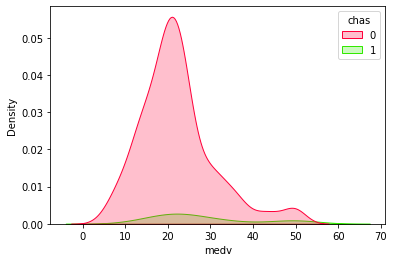

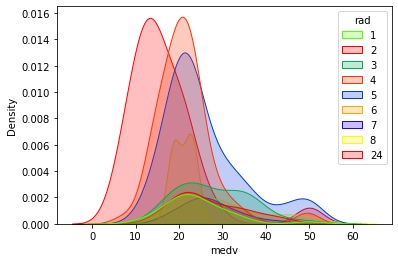

In [19]:
for index, categorical_field in enumerate(categorical_features):
    sns.kdeplot(x = housing_df[median_value_field], hue = housing_df[categorical_field], palette = 'prism_r', shade = True)
    plt.show()

**Insight:**

* **Chas:** persebaran rumah dengan saluran yang membatasi sungai memiliki kisaran harga 10 - 30 ribu dolar.
* **Density:** persebaran rumah dengan hampir semua indeks aksesibilitas memiliki pusat kisaran harga di antara 10 - 30 ribu dolar

Scatter Plot - Relationship & Distribution

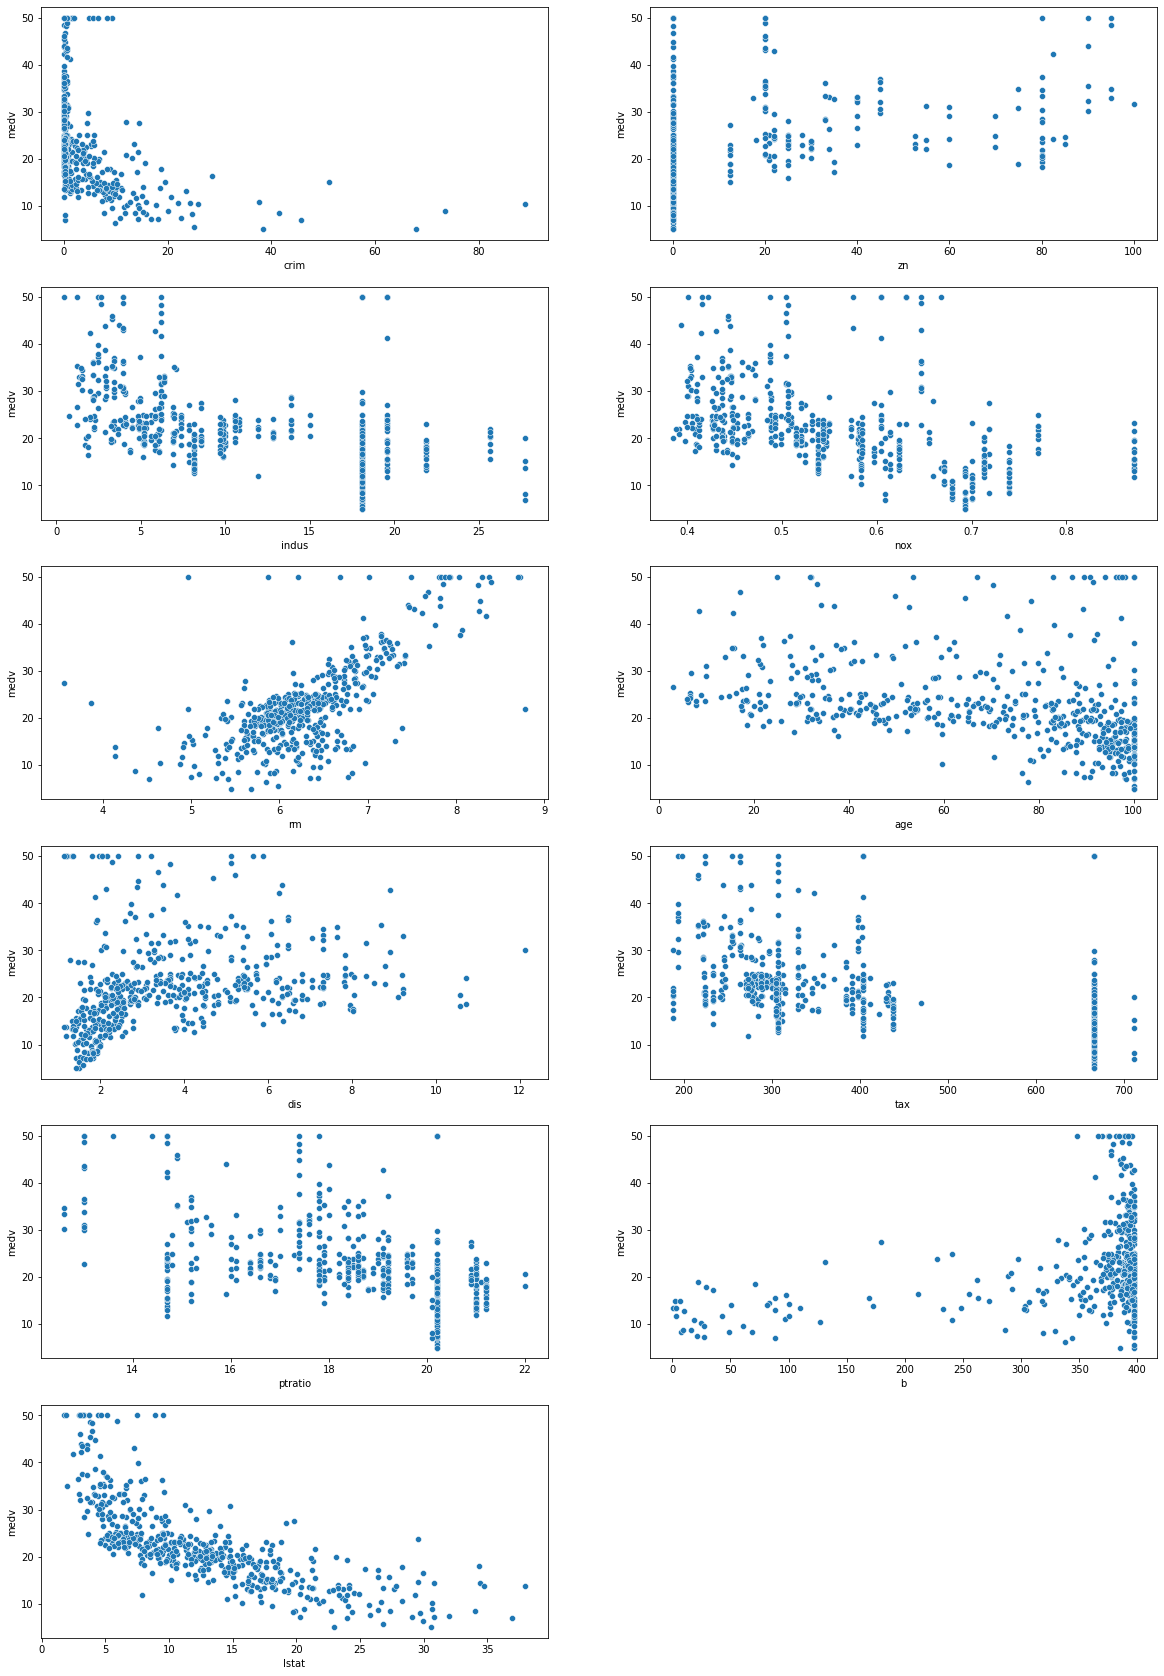

In [20]:
figure = get_plot_figure(20, 30)

for index, numerical_field in enumerate(numerical_features):
    if numerical_field == median_value_field:
        continue

    plt.subplot(6, 2, index + 1)
    
    sns.scatterplot(x = housing_df[numerical_field], y = housing_df[median_value_field])

**Insight**:

Variabel-variabel yang cukup memiliki korelasi adalah sebagai berikut.

* Ltstat (berkorelasi negatif)
* rm (berkorelasi positif)
* ptratio (berkorelasi negatif)

Semua variabel-variabel terdapat cukup banyak outlier.

### Multiple Variables

#### Numerical Variables

Pairplot - Relationship, Distribution, Comparison

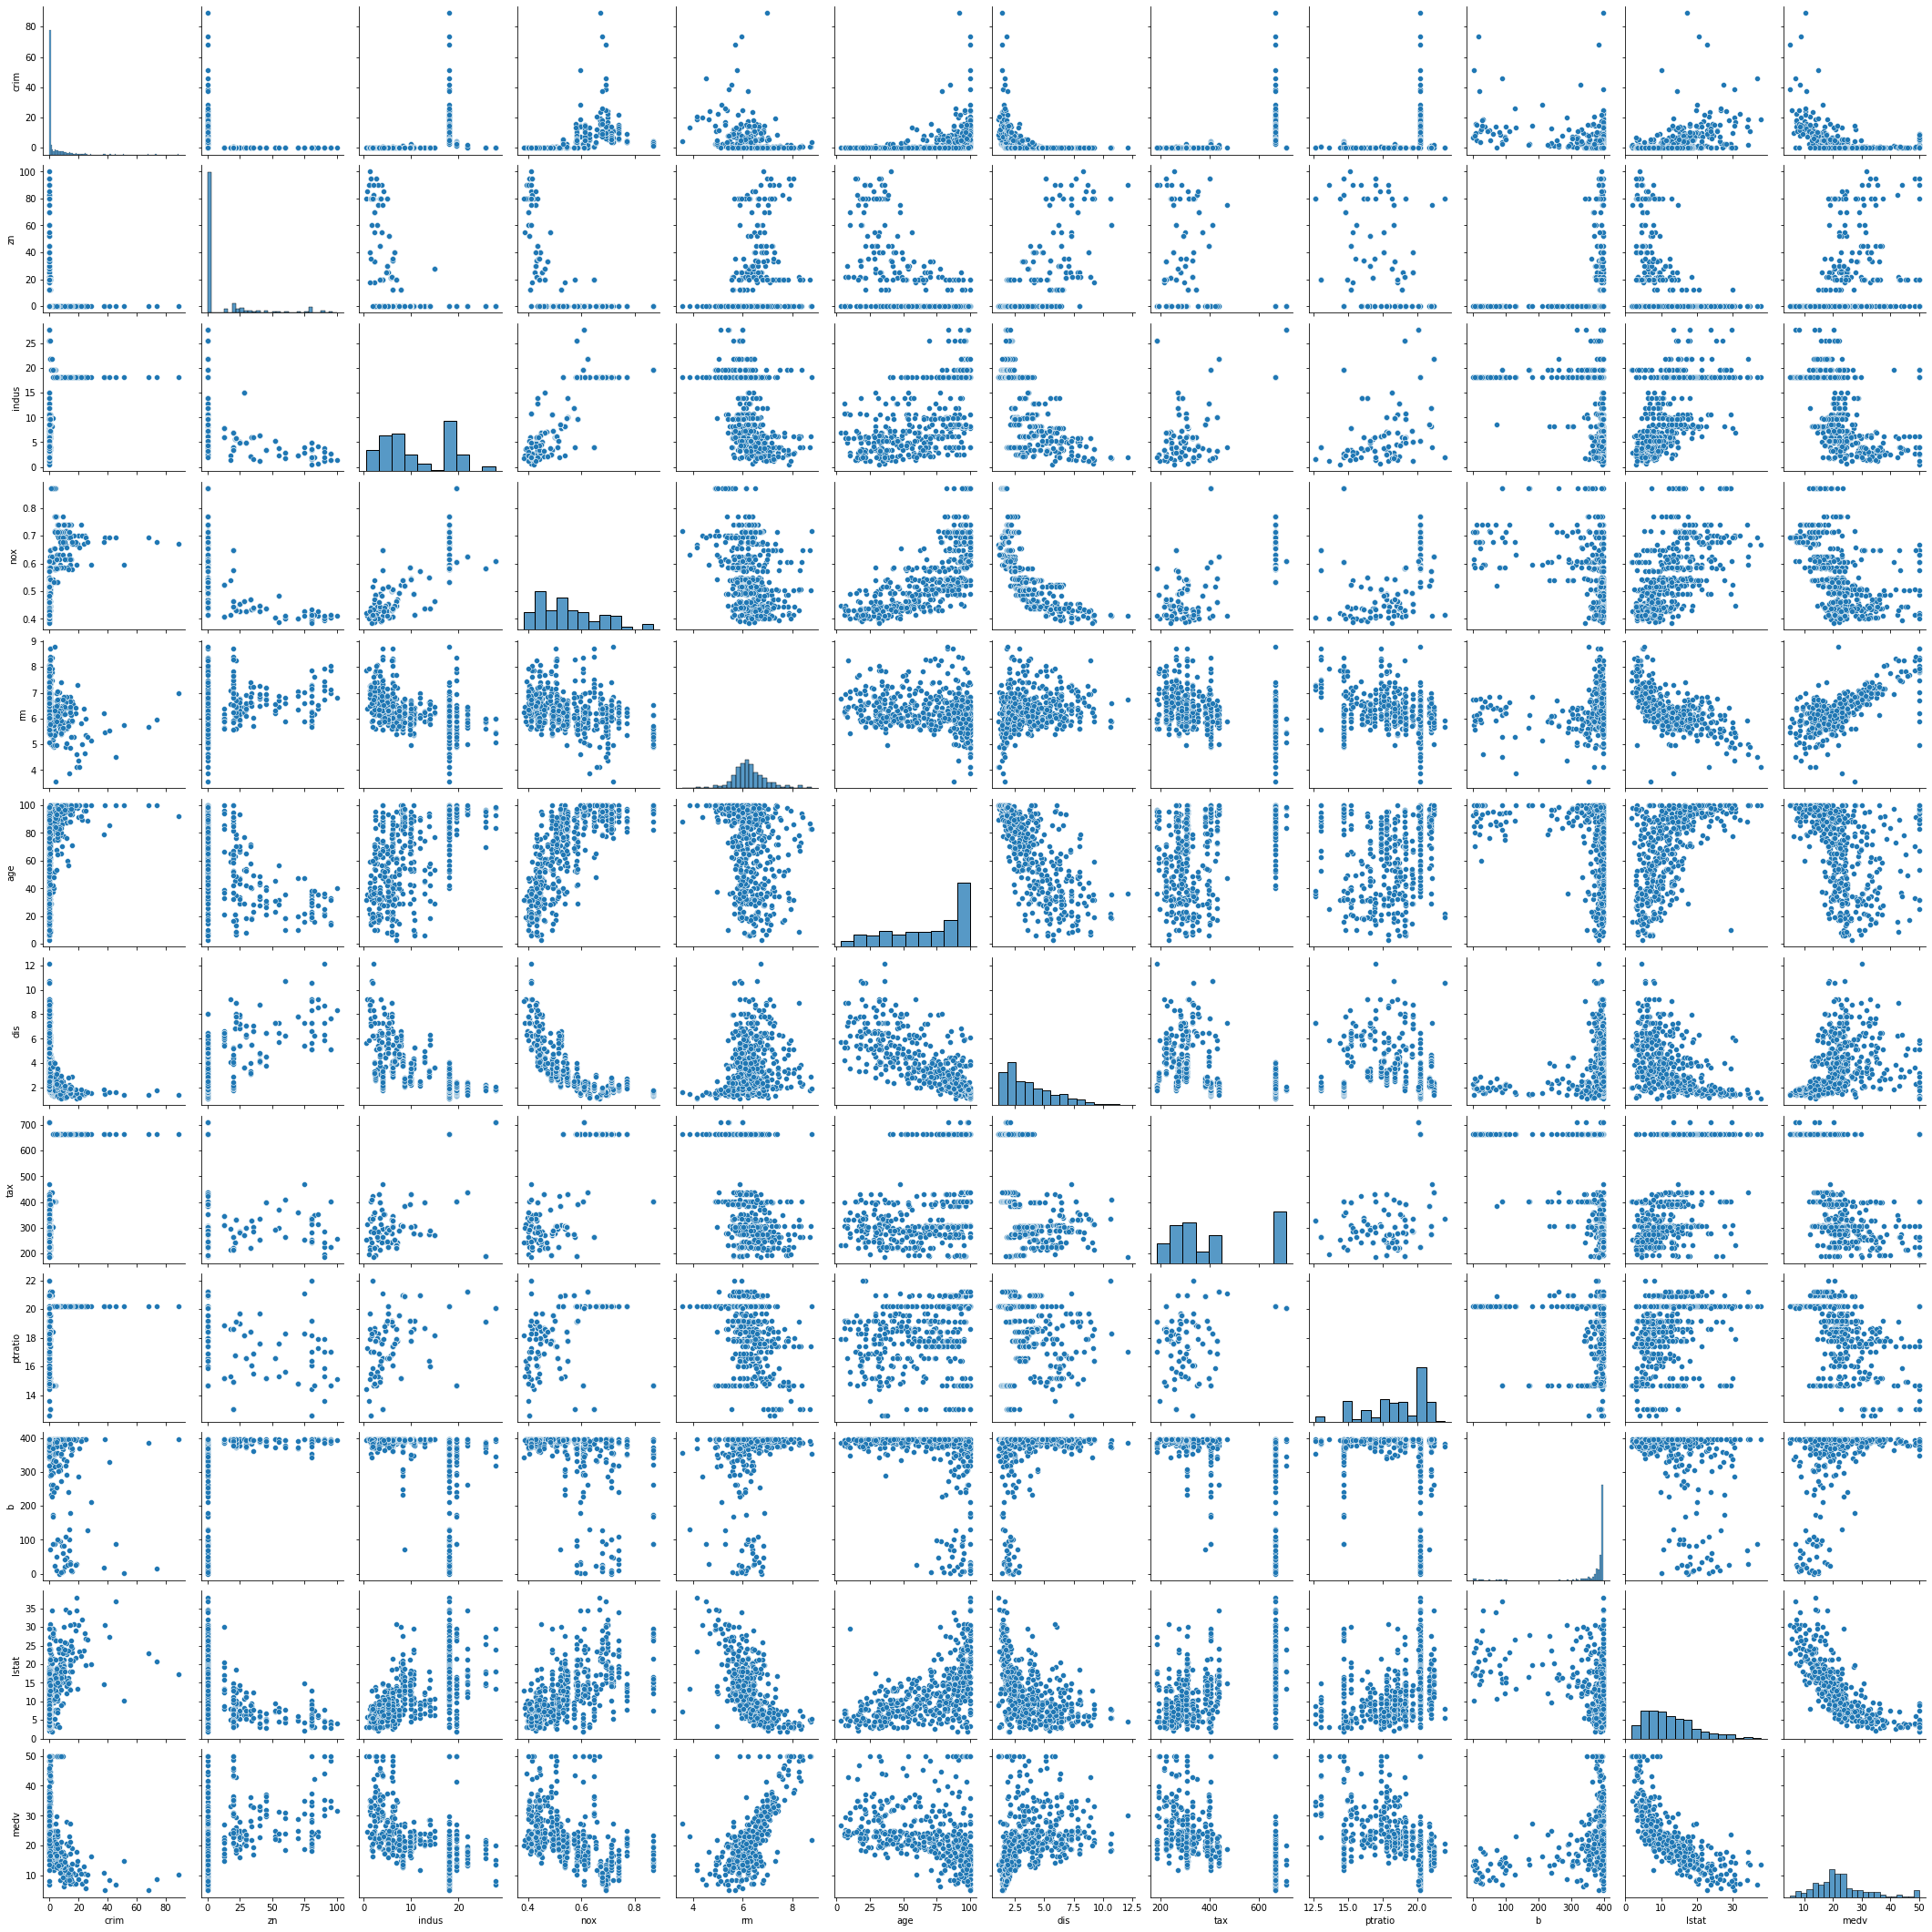

In [21]:
pairplot_fields = numerical_features.copy()

sns.pairplot(data = housing_df[pairplot_fields])

**Insight**:

Banyak hubungan antar variabel yang tidak menunjukkan korelasi dan korelasi tingkat rendah. Namun, ada beberapa korelasi antar variabel yang tinggi, seperti korelasi antara ltstat dan medv.

Heatmap - Correlation/ Relationship - Feature Selection

<Figure size 1080x1080 with 0 Axes>

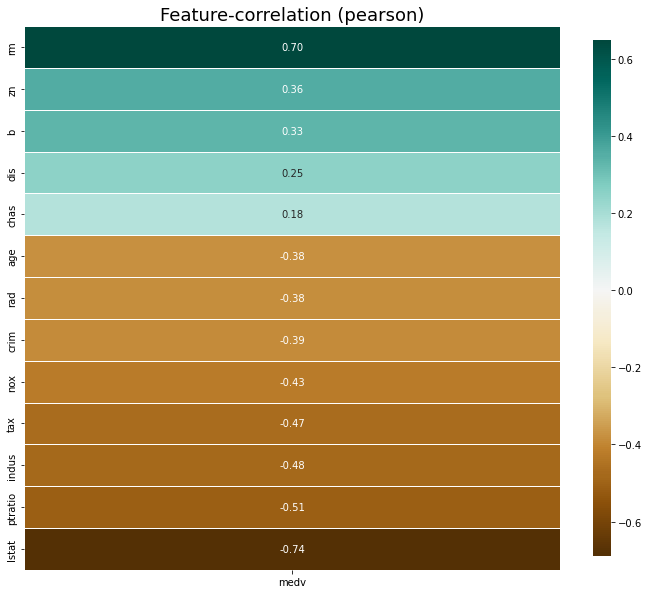

In [22]:
heatmap_fields = numerical_features.copy()
heatmap_fields.append(charles_river_field)
heatmap_fields.append(radial_field)

numerical_correlation_matrix = housing_df[heatmap_fields].corr()

get_plot_figure(15, 15)

klib.corr_plot(data = housing_df, target = median_value_field)
plt.show()

**Insight:**

Dari nilai korelasi di atas, kita bisa mendapatkan insight sebagai berikut.

Variabel-variabel yang berkorelasi cukup tinggi terhadap medv adalah sebagai berikut.
* ptratio (berkorelasi negatif)
* lstat (berkorelasi negatif)
* rm (berkorelasi positif)

Maka dari itu, kita bisa menggunakan variabel-variabel tersebut untuk dimasukkan ke data latihan kepada model machine learning.

## Data Preprocessing

In [23]:
preprocessed_df = housing_df.copy()

### Feature Selection

Penghapusan field berdasarkan hasil dari correlation matrix.

In [24]:
fields_drop = [criminal_field, zoned_field, industrial_field, nitric_oxide_field, 
               age_field, distance_field, b_field, radial_field, charles_river_field]

preprocessed_df.drop(fields_drop, axis = 1, inplace=True)

In [25]:
preprocessed_df.head(1)

,rm,tax,ptratio,lstat,medv
0,6.575,296,15.3,4.98,24.0


### Multicolinearity Analysis

Dari hasil analisis dari feature extraction, kita bisa melihat bahwa nilai korelasi di atas memiliki korelasi yang rendah - cukup tinggi. Namun, semakin banyak variabel yang berkorelasi, maka kita akan lebih sulit untuk mendapatkan insight dari model, karena kita tidak bisa hapus variabel yang ber-kolinear secara langsung. Tujuan mendapatkan insight dari model adalah untuk melakukan optimisasi model, baik pada preprocessing atau hyperparameter tuning. Meskipun mungkin memiliki dampak sedikit pada akurasi, hal ini akan menjadi sulit untuk mendapatkan informasi penting dari hasil modelnya. 

Di sini, kita akan menggunakan nilai VIF. VIF menentukan kekuatan korelasi antara semua fitur-fitur independen yang ada pada dataset tersebut. Ia diprediksikan dengan mengambil variabel dan melakukan regresi dengan variabel tersebut satu per satu. Dari hasil skor VIF, kita bisa melihat seberapa baiknya variabel tersebut direpresentasikan dengan variabel lainnya.

Nilai VIF memiliki rentang sebagai berikut.

* Jika nilai VIF adalah 1, maka ia tidak memiliki korelasi apapun
* Jika nilai VIF berada di atas 5 atau 10 (tergantung kondisi), maka ia memiliki korelasi yang tinggi antar variabel independen lainnya.

Rumus dari VIF adalah sebagai berikut.

$\mathrm{VIF = 1 / (1 - R ^ 2)}$

Dari rumus di atas, R^2 memiliki arti yang sama pada paragraf di atas, yaitu seberapa baiknya variabel independen direpresentasikan kepada variabel independen lainnya.

In [26]:
x = housing_df[feature_selection_fields[:-1]].values
print(x)
print(x.T)

[[  6.575 296.     15.3     4.98 ]
 [  6.421 242.     17.8     9.14 ]
 [  7.185 242.     17.8     4.03 ]
 ...
 [  6.976 273.     21.      5.64 ]
 [  6.794 273.     21.      6.48 ]
 [  6.03  273.     21.      7.88 ]]
[[  6.575   6.421   7.185 ...   6.976   6.794   6.03 ]
 [296.    242.    242.    ... 273.    273.    273.   ]
 [ 15.3    17.8    17.8   ...  21.     21.     21.   ]
 [  4.98    9.14    4.03  ...   5.64    6.48    7.88 ]]


In [27]:
vif = [variance_inflation_factor(x, i) for i in range(len(x.T))]
pd.DataFrame({'VIF': vif [0:]}, index = feature_selection_fields[:-1]).T

,rm,tax,ptratio,lstat
VIF,36.136323,10.809491,57.381331,7.076324


Pada nilai di atas, kita bisa melihat bahwa nilai VIF diatas 5, yang berarti nilai multicolinearitynya adalah tinggi. Maka dari itu, kita tidak bisa menghapus variabel-variabel tersebut, karena nilai korelasi antar variabel memiliki nilai yang tinggi.

### Hapus Outlier

#### Metode IQR

Melihat range interkuartil seluruh field dengan dataset yang ada.

Rumus dari IQR = Kuartil 3 - Kuartil 1

In [28]:
quartile_1 = preprocessed_df.quantile(0.25)
quartile_3 = preprocessed_df.quantile(0.75)

IQR = quartile_3 - quartile_1

print(IQR)

rm           0.738
tax        387.000
ptratio      2.800
lstat       10.005
medv         7.975
dtype: float64


Menghapus Data Outlier jika diluar dari range IQR (lebih dari Q3 dan kurang dari Q1) yang diberikan.

In [29]:
iqr_housing_df = preprocessed_df[~((preprocessed_df < (quartile_1 - 1.5 * IQR)) | (preprocessed_df > (quartile_3 + 1.5 * IQR))).any(axis=1)]

Melihat jumlah data yang tidak outlier

In [30]:
iqr_housing_df.shape[0]

443

Melihat hasil hapus outlier

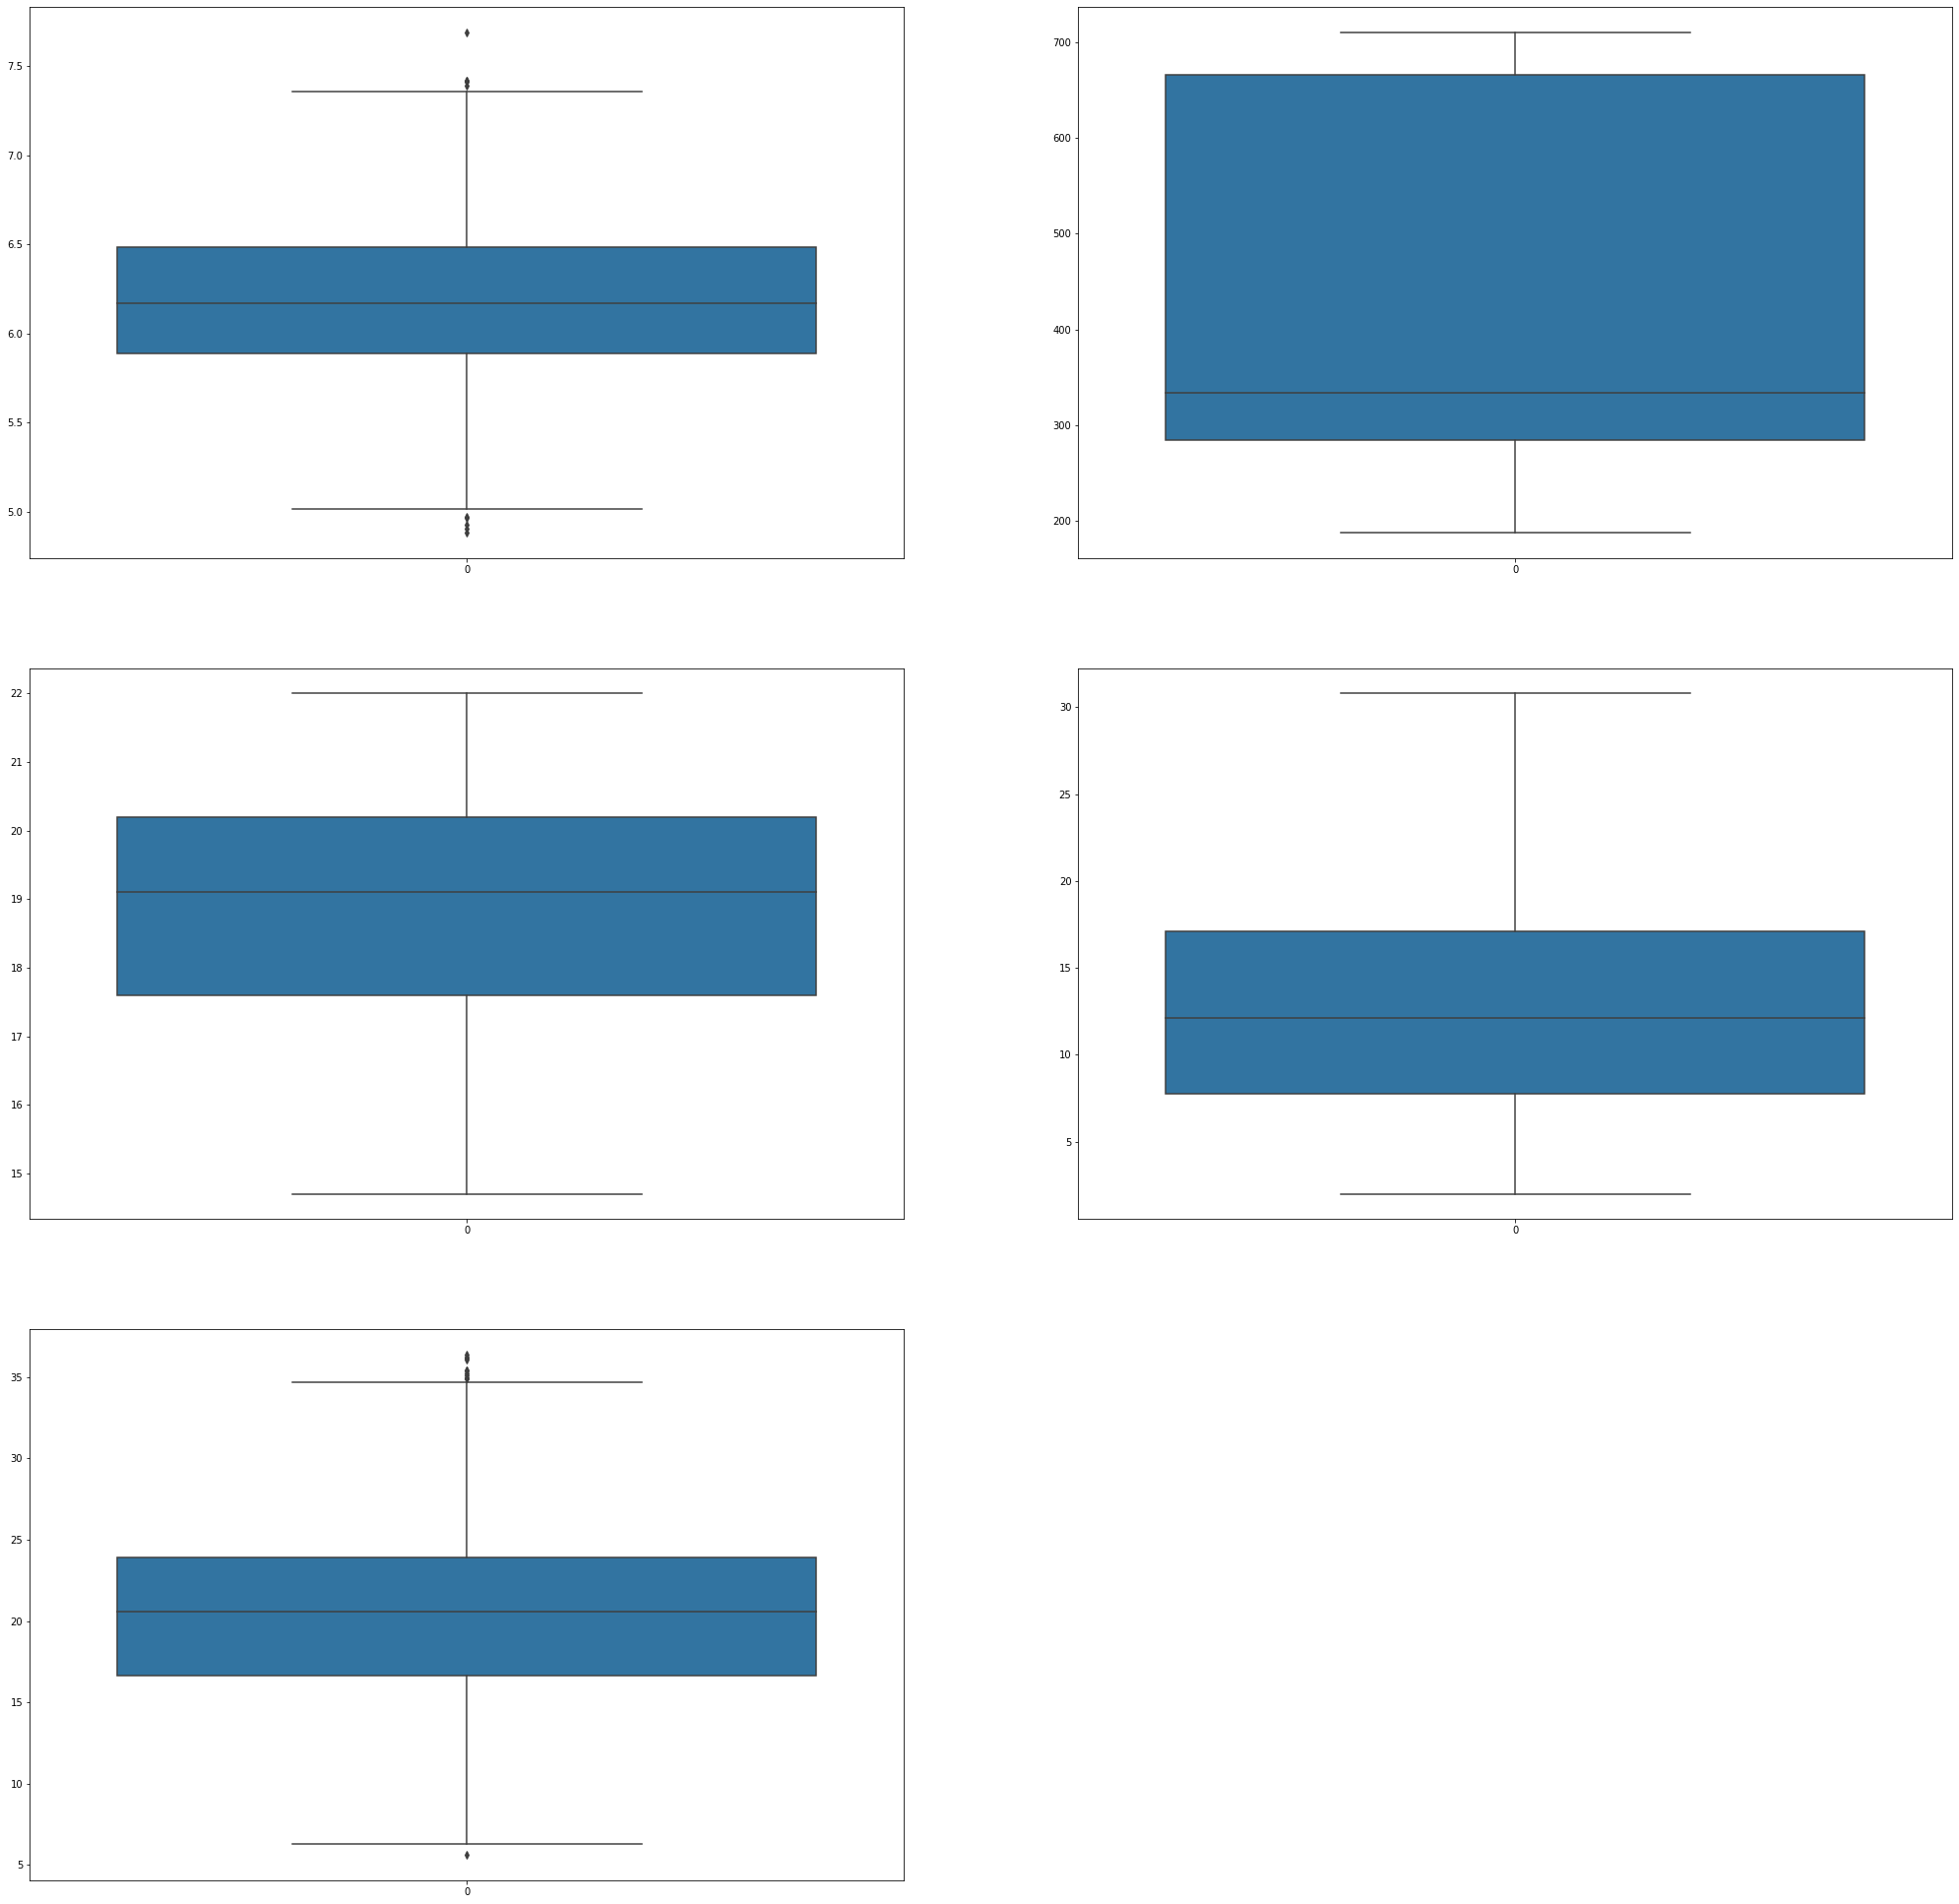

In [31]:
figure = get_plot_figure(35, 35)
for index, field in enumerate(feature_selection_fields):
    plt.subplot(3, 2, index + 1)
    sns.boxplot(data = iqr_housing_df[field])
plt.show()

### Splitting

Melakukan splitting data menjadi train dan test.

In [32]:
features = iqr_housing_df.columns
features = features.drop(median_value_field)

x_train, x_test, y_train, y_test = train_test_split(iqr_housing_df[features], 
    iqr_housing_df[median_value_field], 
    test_size = 0.2,
    random_state=100)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 4)
(89, 4)
(354,)
(89,)


Melakukan plotting train dan test split, agar bisa mengetahui kelayakan persebaran data pada train dan test split ke machine learning.

Features 

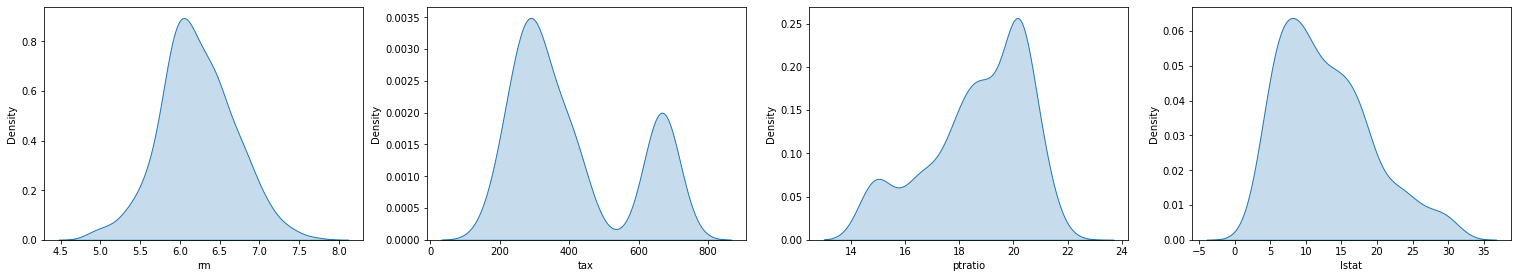

In [33]:
figures = get_plot_figure(40, 30)

for index, field in enumerate(features):
    plt.subplot(6, 6, index + 1)
    sns.kdeplot(x = x_train[field], palette = 'prism_r', shade = True)
plt.show()

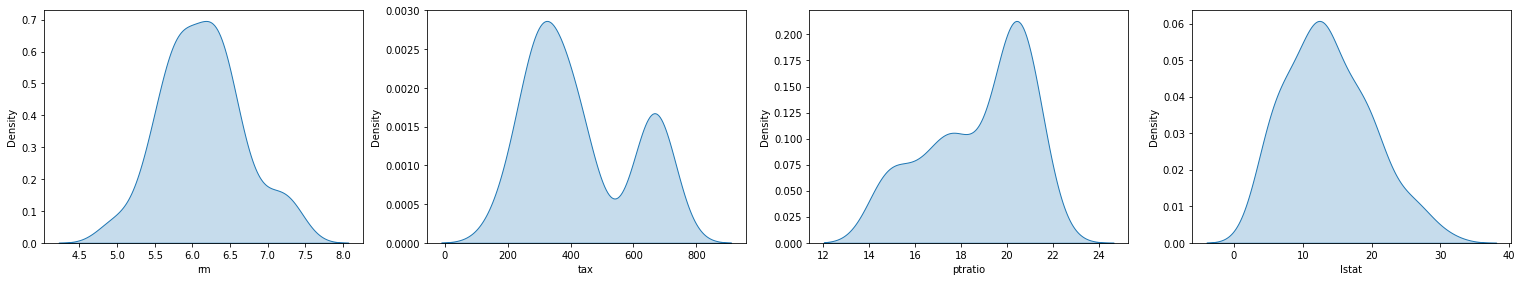

In [34]:
figures = get_plot_figure(40, 30)

for index, field in enumerate(features):
    plt.subplot(6, 6, index + 1)
    sns.kdeplot(x = x_test[field], palette = 'prism_r', shade = True)
plt.show()

Labels

<AxesSubplot:xlabel='medv', ylabel='Density'>

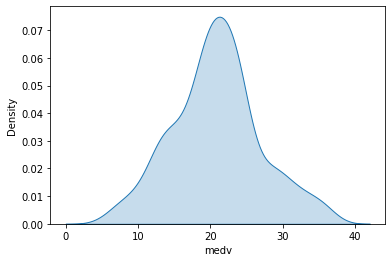

In [35]:
sns.kdeplot(x = y_train, palette = 'prism_r', shade = True)

<AxesSubplot:xlabel='medv', ylabel='Density'>

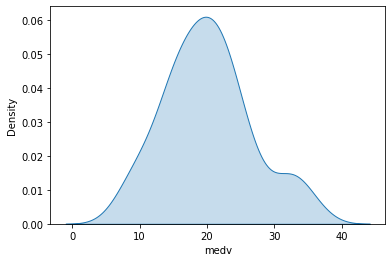

In [36]:
sns.kdeplot(x = y_test, palette = 'prism_r', shade = True)

### Scaling

Memilih field-field yang layak untuk dilakukan scale, karena beberapa field yang terdapat pada dataset adalah kategorikal.

In [37]:
x_scaling_features = feature_selection_fields.copy()
x_scaling_features.remove(median_value_field)

Melakukan scaling data dengan menggunakan MinMaxScaler.

In [38]:
x_robust_scaler = MinMaxScaler()
x_train[x_scaling_features] = x_robust_scaler.fit_transform(x_train[x_scaling_features])
x_test[x_scaling_features] = x_robust_scaler.transform(x_test[x_scaling_features])

y_robust_scaler = MinMaxScaler()
y_train = y_robust_scaler.fit_transform(np.array(y_train).reshape(-1, 1))
y_test = y_robust_scaler.transform(np.array(y_test).reshape(-1, 1))

Melakukan plotting untuk melihat hasil distribusi dari min max scaler.

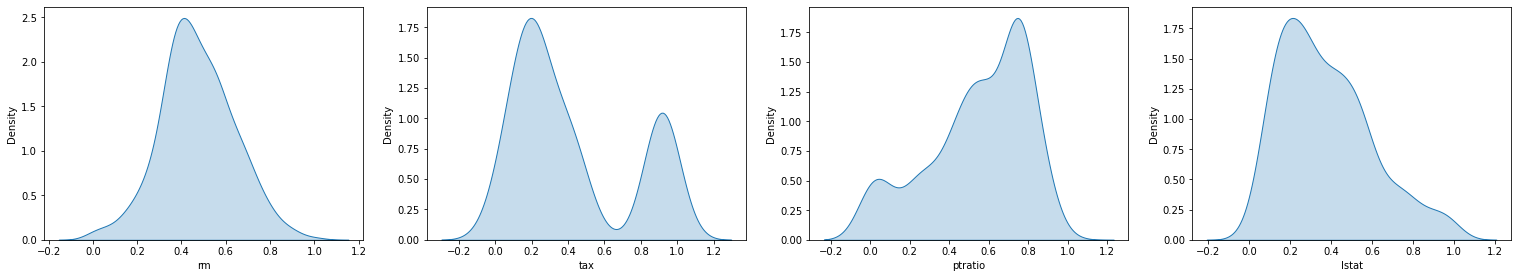

In [39]:
figures = get_plot_figure(40, 30)

for index, field in enumerate(features):
    plt.subplot(6, 6, index + 1)
    sns.kdeplot(x = x_train[field], palette = 'prism_r', shade = True)
plt.show()

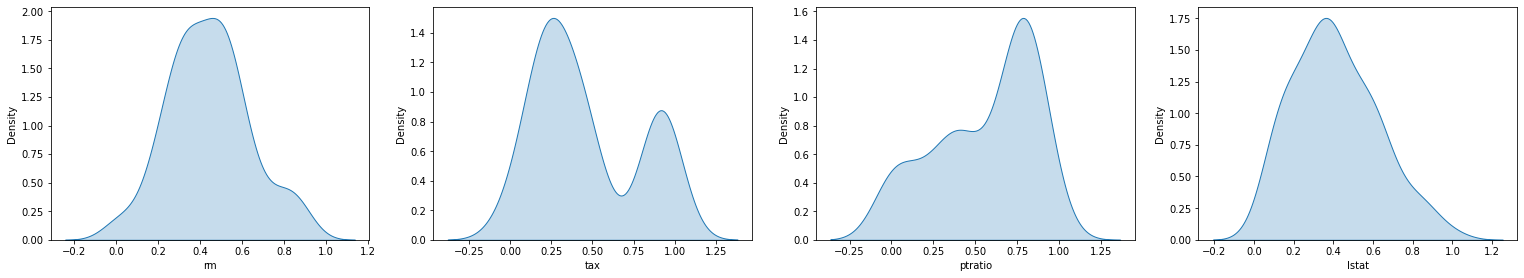

In [40]:
figures = get_plot_figure(40, 30)

for index, field in enumerate(features):
    plt.subplot(6, 6, index + 1)
    sns.kdeplot(x = x_test[field], palette = 'prism_r', shade = True)
plt.show()

<AxesSubplot:ylabel='Density'>

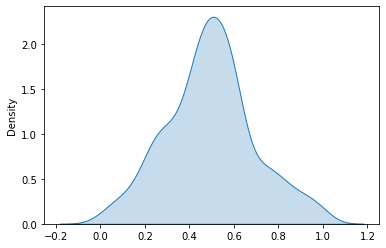

In [41]:
sns.kdeplot(x = y_train.flatten(), palette = 'prism_r', shade = True)

<AxesSubplot:ylabel='Density'>

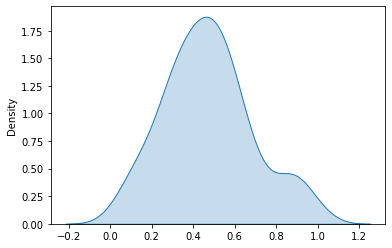

In [42]:
sns.kdeplot(x = y_test.flatten(), palette = 'prism_r', shade = True)

Dari grafik di atas, kita bisa melihat bahwa grafik setelah dan sebelum dilakukan preprocessing adalah sama. Namun, perhatikan bahwa nilai pada sumbu x memiliki range yang berbeda dengan aslinya. Itulah fungsi dari MinMaxScaler, yaitu menjaga agar distribusi tetap sama, namun dengan range antara 0 - 1.

### Feature Extraction

Melihat correlation matrix dari hasil feature selection.

<AxesSubplot:>

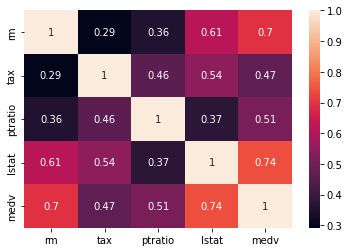

In [43]:
preprocessed_correlation_matrix = preprocessed_df.corr().abs()

sns.heatmap(preprocessed_correlation_matrix, annot = True)

Dari hasil correlation matrix, di atas, hubungan antara penurunan populasi pada kota tersebut dan rata-rata jumlah ruangan cukup berkorelasi (0.61). Maka dari itu, kita akan mencoba melakukan reduksi dengan PCA.

PCA bekerja dengan mencari varian yang dengan nilai tinggi. Varian adalah nilai yang menunjukkan seberapa tinggi informasi yang disimpan pada suatu row. Dengan ini, kita akan mencoba untuk melihat variabel-variabel dengan korelasi tertinggi. Dari hasil correlation matrix di atas, kita bisa melakukan reduksi fitur.

Tujuan dari reduksi fitur adalah untuk mengurangi overfitting pada model artificial intelligence. Apabila terlalu banyak fitur yang dianalisa, model bisa saja menjadi overfitting, karena ia terlalu banyak mempelajari fitur pada dataset yang ada. Meskipun dengan reduksi fitur, ia akan tetap bisa mempelajari pola pada dataset dengan baik, jika nilai varian pada reduksi fitur adalah tinggi.

Melakukan PCA dari data training dan data testing.

In [44]:
pca_fields = [room_field, lower_stat_field]

pca_model = PCA(n_components=1, random_state=100)
x_train[crowd_level_field] = pca_model.fit_transform(x_train[pca_fields]).flatten()
x_test[crowd_level_field] = pca_model.transform(x_test[pca_fields]).flatten()

print("Variance: ", pca_model.explained_variance_ratio_)

x_train

Variance:  [0.79391363]


,rm,tax,ptratio,lstat,crowd_level
75,0.496055,0.402672,0.547945,0.241415,-0.127032
122,0.379484,0.001908,0.602740,0.553243,0.200766
409,0.699067,0.914122,0.753425,0.617412,0.093604
84,0.532999,0.114504,0.520548,0.265002,-0.125495
313,0.488881,0.223282,0.506849,0.205342,-0.154453
...,...,...,...,...,...
401,0.516499,0.914122,0.753425,0.636143,0.202524
421,0.395624,0.914122,0.753425,0.475893,0.125947
377,0.678264,0.914122,0.753425,0.668054,0.147791
324,0.542324,0.190840,0.671233,0.143600,-0.234787


Menghapus Field rm dan lstat, karena sudah dilakukan PCA dan tidak diproses lagi.

In [45]:
x_train.drop([room_field, lower_stat_field], axis = 1, inplace = True)
x_test.drop([room_field, lower_stat_field], axis = 1, inplace = True)

x_train

,tax,ptratio,crowd_level
75,0.402672,0.547945,-0.127032
122,0.001908,0.602740,0.200766
409,0.914122,0.753425,0.093604
84,0.114504,0.520548,-0.125495
313,0.223282,0.506849,-0.154453
...,...,...,...
401,0.914122,0.753425,0.202524
421,0.914122,0.753425,0.125947
377,0.914122,0.753425,0.147791
324,0.190840,0.671233,-0.234787


Dari informasi tersebut, kita bisa melihat bahwa variansi yang dimiliki oleh PCA 1 adalah 0.998. Ini berarti, 99.8% informasi telah tersimpan di komponen pertama. Dengan demikian, kita bisa menggunakan relasi ini untuk digunakan dalam model.

In [46]:
print("Train Size:", x_train.shape)
print("Test Size:", x_test.shape)

Train Size: (354, 3)
Test Size: (89, 3)


## Modelling

Dalam hal ini, saya akan menggunakan tiga algoritma paling sederhana, yaitu Linear Regression, Lasso Regression, dan Ridge Regression. Terlebih lagi, saya akan melakukan teknik optimisasi dengan menggunakan Grid Search. Tujuannya adalah agar kita bisa mendapatkan model terbaik dari hyperparameter tuning secara otomatis.

Dengan hyperparameter tuning secara otomatis, kita bisa menghemat waktu untuk mendapatkan nilai parameter yang sesuai.

Inisialisasi Model

In [47]:
linear_regression_model = LinearRegression()
lasso_regression_model = Lasso()
ridge_regression_model = Ridge()

models = [linear_regression_model, 
          lasso_regression_model,
          ridge_regression_model]

Menggunakan Grid Search untuk mendapatkan hyperparameter tuning terbaik dari pilihan-pilihan nilai yang kita definisikan. Dari pilihan-pilihan nilai yang kita definisikan, grid search akan mencari nilai dari suatu parameter terbaik dari model Linear Regression.

Dalam kasus ini, terdapat satu parameter yang bisa kita otomatisasikan, yaitu fit_intercept. fit_intercept adalah parameter untuk mendefinisikan apakah kita perlu nilai pemotongan sumbu y. Jika tidak, maka nilai tersebut tidak diberikan pada persamaan garis.

In [48]:
parameters_linear = {
    'fit_intercept': [True, False], 
}

parameters_lasso_and_ridge = {
    'fit_intercept': [True, False],
    'max_iter': [50, 100, 400, 700, 1000],
    'tol': [0.0001, 0.00005, 0.00001],
    'alpha': [0.0001, 0.0002, 0.0003, 0.0005, 0.0007, 0.0009],
}

model_parameters = [parameters_linear, parameters_lasso_and_ridge, parameters_lasso_and_ridge]

for model_index, model in enumerate(models):
    grid_search_model = GridSearchCV(model, model_parameters[model_index])
    grid_search_model.fit(x_train, y_train)
    print(grid_search_model.best_params_)

{'fit_intercept': True}
{'alpha': 0.0009, 'fit_intercept': True, 'max_iter': 50, 'tol': 0.0001}
{'alpha': 0.0009, 'fit_intercept': True, 'max_iter': 50, 'tol': 0.0001}


**Feed Data ke Machine Learning dengan menggunakan parameter yang disediakan dari Grid Search.**

Pada proyek ini, saya akan menggunakan tiga model sederhana, seperti pada paragraf awal modelling.

Berikut adalah penjelasan singkat untuk masing-masing model.

* **Linear Regression:** suatu metode yang digunakan untuk melakukan prediksi nilai numerik dengan menggunakan garis lurus sederhana. Untuk melakukan prediksi dengan benar, ia akan menggunakan distance error untuk membantu model menentukan perubahan garis dengan tingkat kesalahan yang lebih kecil. Cara model melakukan perubahan pada model adalah dengan menghitung Least Square Method.

    Jika kita memiliki garis lurus sebagai berikut:
    $\mathrm{y = ax + b}$

    Dari sini, Least Square Method akan melakukan normalisasi pada variabel a dan b.


* **Lasso Regression:** suatu metode yang cara kerjanya hampir sama dengan Linear Regression. Namun, ia menerapkan metode penyusutan. Penyusutan bertujuan agar model linear hanya menggunakan parameter yang sedikit saja. Model ini bekerja dengan baik apabila terdapat nilai multicollinearity yang tinggi atau mau melakukan automatisasi seleksi fitur.
  
  Lasso Regression menggunakan regularisasi L1, sebagai penalti kepada nilai magnitude koefisien. Dengan regularisasi ini, nilai koefisien pada beberapa variabel fitur bisa saja menjadi 0. Maka dari itu, dapat disimpulkan bahwa regularisasi L1 sejalan dengan eliminasi fitur.
  
* **Ridge Regression:** suatu metode yang cara kerjanya hampir sama dengan Linear Regression. Namun, ia menerapkan metode regularisasi untuk analisis variance. Variance adalah seberapa pentingnya informasi yang ada di dalam suatu variabel untuk memprediksi suatu angka.

  Ridge Regression juga melakukan standardisasi variabel dengan mengurangi nilai pada suatu fitur dengan rata-rata, lalu dibagi dengan standar deviasi. Kalkulasi nilai koefisien regresi didasarkan dengan variabel-variabel ter-standardisasi. Ketika nilai akhir koefisien ditampilkan, ia diskalakan menjadi skala original. Namun, trace dari ridge berada pada skala ter-standardisasi.

  Jika Lasso Regression menggunakan normalisasi L1, maka Ridge Regression menggunakan normalisasi L2. L2 menggunakan nilai kuadrat dari magnitude suatu koefisien. Koefisien akan dikecilkan berdasarkan faktor yang sama, jadi tidak ada koefisien yang ter-eliminasi. Dengan ini, L2 tidak akan menghasilkan model yang sparse.

In [49]:
linear_regression_model.fit_intercept = True
linear_regression_model.fit(X = x_train, y = y_train)

lasso_regression_model.fit_intercept = True
lasso_regression_model.set_params(max_iter = 50, alpha = 0.0009, tol = 0.0001)
lasso_regression_model.fit(X = x_train, y = y_train)

ridge_regression_model.fit_intercept = True
ridge_regression_model.set_params(max_iter = 50, alpha = 0.0009, tol = 0.0001)
ridge_regression_model.fit(X = x_train, y = y_train)

Ridge(alpha=0.0009, max_iter=50, tol=0.0001)

Memberikan nama dari setiap model yang diinisialisasikan

In [50]:
linear_model_names = ["Linear Regression", "Lasso Regression", 'Ridge Regression']

Melihar equation dari model tersebut.

In [51]:
for index, linear_model_name in enumerate(linear_model_names):
    print(f"{linear_model_name}: ")
    print('Coefficient: ', models[index].coef_[0])
    print('Intercept: ', models[index].intercept_)
    print()


Linear Regression: 
Coefficient:  [-0.11641193 -0.1351853  -0.54027711]
Intercept:  [0.61532904]

Lasso Regression: 
Coefficient:  -0.11549031772930844
Intercept:  [0.60888895]

Ridge Regression: 
Coefficient:  [-0.11641975 -0.13518152 -0.54025095]
Intercept:  [0.61533023]



### Test Model

Melihat akurasi dari model.

In [52]:
for index, model in enumerate(models):
    accuracy_score = model.score(X = x_test, y = y_test)
    print(f"{linear_model_names[index]} Accuracy Score:", accuracy_score)

Linear Regression Accuracy Score: 0.7212565372331727
Lasso Regression Accuracy Score: 0.7210107152672443
Ridge Regression Accuracy Score: 0.7212586021389754


Melakukan prediksi dari data-data testing

In [53]:
predicted_values = {}

for index, model in enumerate(models):
    model_name = linear_model_names[index]
    predicted_values[linear_model_names[index]] = model.predict(x_test)

Mendefinisikan masing-masing error dari sklearn.

In [54]:
errors_linear = {
    "MSE": mean_squared_error(y_test, predicted_values[linear_model_names[0]]), 
    "MAE": mean_absolute_error(y_test, predicted_values[linear_model_names[0]]), 
    "RMSE": np.sqrt(mean_squared_error(y_test, predicted_values[linear_model_names[0]]))
}

errors_lasso = {
    "MSE": mean_squared_error(y_test, predicted_values[linear_model_names[1]]), 
    "MAE": mean_absolute_error(y_test, predicted_values[linear_model_names[1]]), 
    "RMSE": np.sqrt(mean_squared_error(y_test, predicted_values[linear_model_names[1]]))
}

errors_ridge = {
    "MSE": mean_squared_error(y_test, predicted_values[linear_model_names[2]]), 
    "MAE": mean_absolute_error(y_test, predicted_values[linear_model_names[2]]), 
    "RMSE": np.sqrt(mean_squared_error(y_test, predicted_values[linear_model_names[2]]))
}

errors = [errors_linear, errors_lasso, errors_ridge]

In [55]:
for index, error in enumerate(errors):
    print(f"{linear_model_names[index]}")
    for index, error_name in enumerate(error):
        print(f"{error_name}: {error[error_name]}")
    print()

Linear Regression
MSE: 0.012412639242449338
MAE: 0.08668855332806169
RMSE: 0.11141202467619614

Lasso Regression
MSE: 0.012423585864661217
MAE: 0.08666465607378505
RMSE: 0.11146114060362569

Ridge Regression
MSE: 0.012412547290765361
MAE: 0.08668857537658757
RMSE: 0.11141161201044243



### Analisis Hasil

Apabila kita lihat pada hasil pada ketiga model pada tahap modelling, berikut adalah insight yang didapat.

* Akurasi dan error yang didapatkan dari ketiga model tidak terlalu jauh berbeda. Namun, angka tersebut menunjukkan bahwa model-model tersebut cukup mampu dalam mendeteksi nilai harga rumah pada dataset yang diberikan. Hal ini disebabkan karena nilai-nilai korelasi pada masing-masing variabel berada pada rentang 0.5 - 0.6. Korelasi tersebut menunjukkan nilai yang kurang - cukup. Namun, nilai akurasi yang cukup tinggi bisa saja terjadi karena pengaruh dari nilai VIF itu sendiri. VIF berpengaruh kepada seberapa kuatnya fitur independen dengan fitur-fitur lainnya. Namun, karena nilai VIF yang tinggi, koefisien-koefisien pada masing-masing variabel bisa saja berpengaruh, sehingga bisa saja menjadi faktor pada nilai akurasi yang ada.
  
* Seperti yang disampaikan pada tahap modelling, perhatikan nilai pada koefisien pada Lasso Regression. Koefisien yang dihasilkan pada model tersebut hanya satu saja. Meskipun demikian, ia mampu menghasilkan nilai akurasi dan error yang setara dengan Linear Regression. Ini berarti, Lasso Regression mampu melakukan optimisasi performa daripada Linear Regression, namun tidak mengorbankan nilai akurasi dan error.

* Perhatikan nilai koefisien dan intercept yang dihasilkan pada Ridge Regression. Apabila kita perhatikan, nilai pada koefisien Ridge Regression sama dengan nilai pada koefisien Linear Regression. Seperti pada penjelasan sebelumnya, proses pada model ini menggunakan metode standardisasi. Namun, apabila kita perhatikan, fitur-fitur yang ada sudah pernah distandardisasi dengan menggunakan MinMaxScaler. Maka dari itu, hasil standardisasi pada model ini tidak akan terlalu berpengaruh kepada akurasi dan error yang dihasilkan oleh model.